In [162]:
# Setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from time import time
from skimage import io
from skimage import filters
from skimage.feature import corner_peaks
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from cs347 import get_hog, plot_hog

In [164]:
# Compute hog representation of wire
image_wire = imread('components/wire.png', as_grey=True)
image_wire = rescale(image_wire, 0.5)

(hog_wire, hog_image_wire) = get_hog(image_wire)

In [165]:
# Compute hog representation of voltage source
image_voltagesource = imread('components/voltagesource.png', as_grey=True)
image_voltagesource = rescale(image_voltagesource, 0.6)

(hog_voltagesource, hog_image_voltagesource) = hog_feature(image_voltagesource)

In [166]:
# Compute hog representation of resistor
image_resistor = imread('components/resistor.png', as_grey=True)

(hog_resistor, hog_image_resistor) = hog_feature(image_resistor)

In [167]:
from cs347 import pyramid_score, plot_prediction_pyramid, pyramid_find_objects

image = io.imread("circuit1.png", as_grey=True)

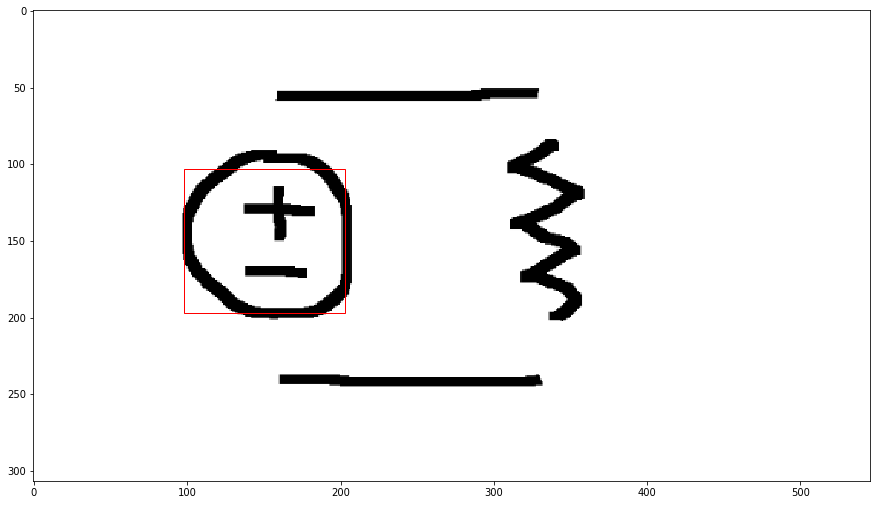

In [175]:
# Search for voltage source
(winH, winW) = image_voltagesource.shape
max_score, maxr, maxc, max_scale = pyramid_find_objects \
        (image, 8, hog_voltagesource, image_voltagesource.shape, stepSize = 30, scale=0.8)   
    
for i in range(len(maxc)):
    plot_prediction_pyramid(image, max_scale[i], winW, winH, maxc[i], maxr[i])

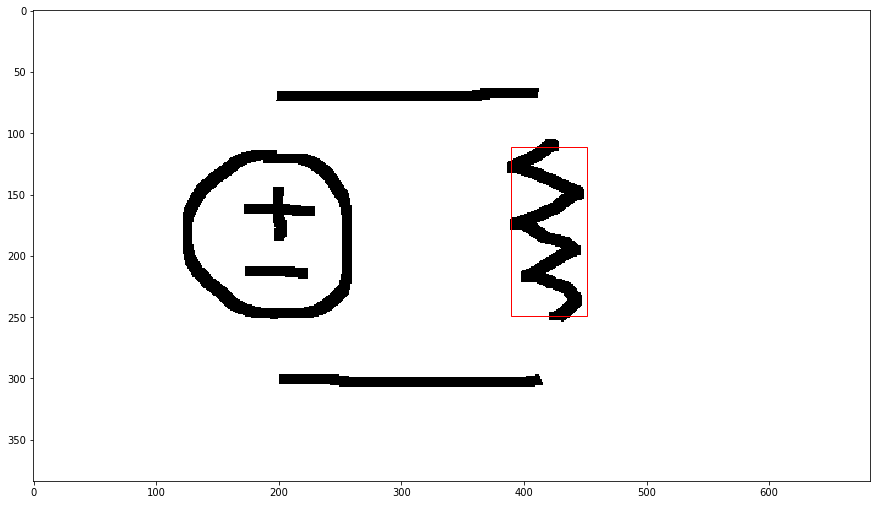

In [176]:
# Search for resistor
(winH, winW) = image_resistor.shape
max_score, maxr, maxc, max_scale = pyramid_find_objects \
        (image, 4, hog_resistor, image_resistor.shape, stepSize = 30, scale=0.8)  
    
for i in range(len(maxc)):
    plot_prediction_pyramid(image, max_scale[i], winW, winH, maxc[i], maxr[i])

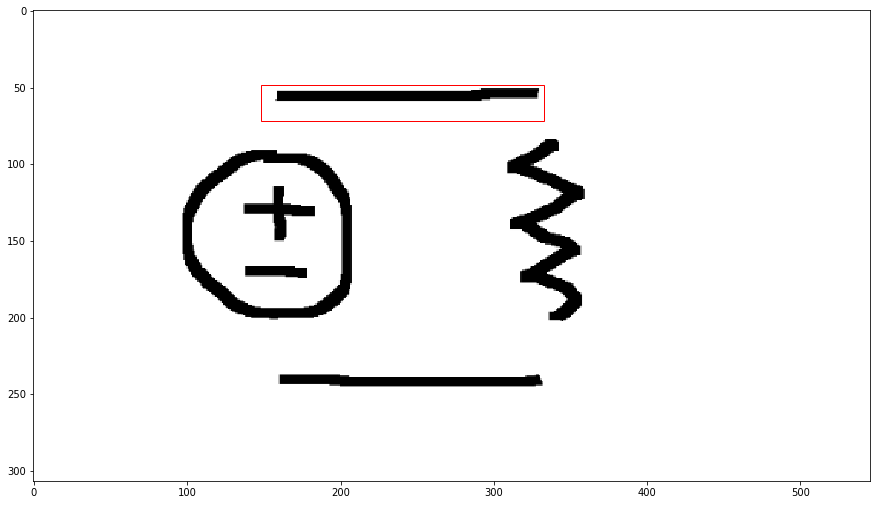

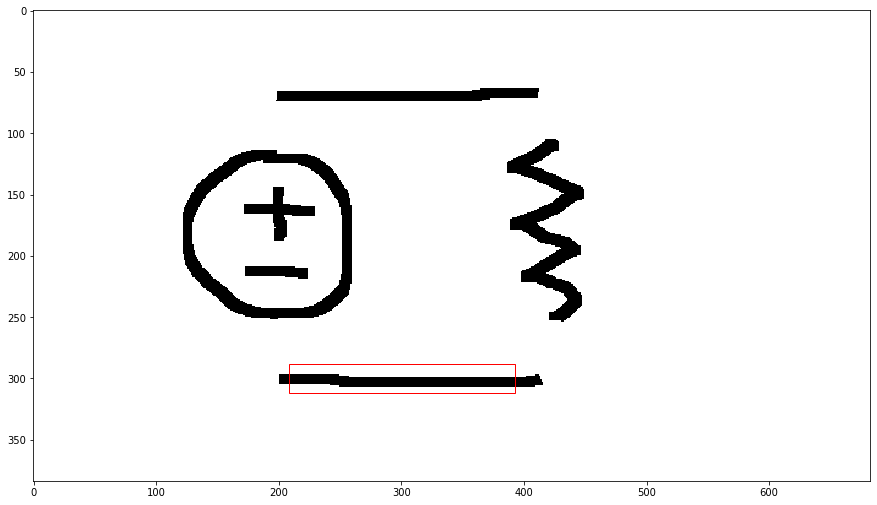

In [177]:
# Search for wire
(winH, winW) = image_wire.shape
max_score, maxr, maxc, max_scale = pyramid_find_objects \
        (image, 1.5, hog_wire, image_wire.shape, stepSize = 30, scale=0.8)

for i in range(len(maxc)):
    plot_prediction_pyramid(image, max_scale[i], winW, winH, maxc[i], maxr[i])